In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

earthquake = []
with open('earthquake.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        earthquake.append(row)
        print(', '.join(row))

# dataset: GeoCSV 2.0, 
# delimiter: , 
# SID: II_PFO_00_BH1, 
# sample_count: 2400, 
# sample_rate_hz: 20, 
# start_time: 2018-09-22T08:19:19.019538Z, 
# field_unit: UTC,  Counts
# field_type: datetime,  INTEGER
Time,  Sample
2018-09-22T08:19:19.019538Z, 368
2018-09-22T08:19:19.069538Z, 359
2018-09-22T08:19:19.119538Z, 346
2018-09-22T08:19:19.169538Z, 251
2018-09-22T08:19:19.219538Z, 218
2018-09-22T08:19:19.269538Z, 149
2018-09-22T08:19:19.319538Z, 128
2018-09-22T08:19:19.369538Z, 121
2018-09-22T08:19:19.419538Z, 57
2018-09-22T08:19:19.469538Z, 65
2018-09-22T08:19:19.519538Z, 18
2018-09-22T08:19:19.569538Z, -4
2018-09-22T08:19:19.619538Z, 0
2018-09-22T08:19:19.669538Z, -30
2018-09-22T08:19:19.719538Z, -53
2018-09-22T08:19:19.769538Z, -61
2018-09-22T08:19:19.819538Z, -39
2018-09-22T08:19:19.869538Z, -64
2018-09-22T08:19:19.919538Z, -63
2018-09-22T08:19:19.969538Z, -95
2018-09-22T08:19:20.019538Z, -132
2018-09-22T08:19:20.069538Z, -100
2018-09-22T08:19:20.119538Z, -90
2018-09-22T08:19:2

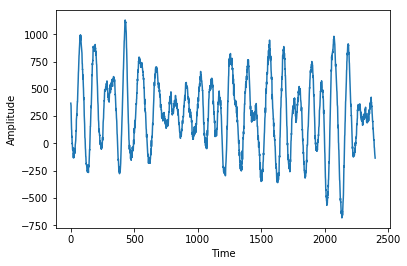

In [2]:
amplitude = [value[1] for value in earthquake[9:]]
amplitude = np.array(amplitude).astype('float')

plt.plot(amplitude[0:-1:1])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [3]:
from trajectory import *

#constants
amplitudeScale = np.max(np.abs(amplitude)) 
gearRatio = 2**14 / 500 #200 ppr
stepSize = 2 * np.pi / 2** 14 * gearRatio #in radians

#scale earthquake
earthquake = amplitude / amplitudeScale * np.pi #sets to +/- pi radians max


error, trajectory is not fine enough, error mag is 31.250000000000014


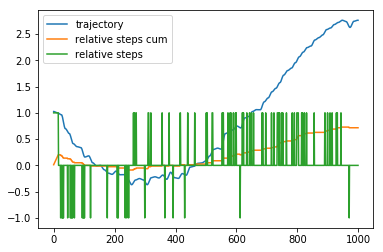

In [4]:
earthquakeSpaced = []
trajPlanner = trajectoryGenerator()
output, status = generateStepArray(earthquake, stepSize)
scaleConst = 1

if status == -1:
    scaleConst = 2*int(np.ceil(output))
    for i in range(len(earthquake) - 1):
        a = earthquake[i]
        b = earthquake[i+1]
        trajectory = trajPlanner.createTrajectoryNumPoints(a,b,scaleConst)
        trajectory = trajectory.squeeze().tolist()
        earthquakeSpaced.extend(trajectory)
    earthquakeSpaced = np.array(earthquakeSpaced)
#else:
#    earthquakeSpaced = earthquake
relativeSteps, _ = generateStepArray(earthquakeSpaced, stepSize)

plt.figure()
plt.plot(earthquakeSpaced[0:5000:5])
plt.plot(np.cumsum(relativeSteps[0:5000:5])*stepSize, '-')
plt.plot(relativeSteps[0:5000:5], '-')
plt.legend(['trajectory', 'relative steps cum', 'relative steps'])
plt.show()

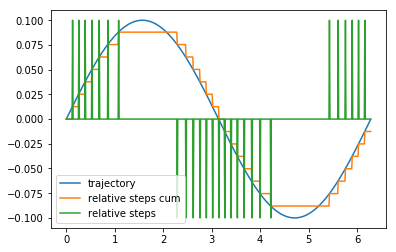

In [5]:
x = np.arange(0,2*np.pi, 0.01)
y = np.sin(x)*0.1

output, _ = generateStepArray(y, stepSize)
 
plt.figure()
plt.plot(x,y)
plt.plot(x,np.cumsum(output)*stepSize)
plt.plot(x,output*0.1)
plt.legend(['trajectory', 'relative steps cum', 'relative steps'])
plt.show()